<a href="https://colab.research.google.com/github/Hutch03/Portafolio/blob/main/python-ciencia-datos/arbol-knn/arbol-over-under-samplig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [138]:
import pandas as pd
df=pd.read_csv('prestacar.csv')
df.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [140]:
df.describe()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


In [141]:
df.isnull().sum()

,0
ingresos_cliente,0
anualidad_prestamo,0
años_casa_propia,0
telefono_trab,0
evaluacion_ciudad,0
score_1,0
score_2,0
score_3,0
score_social,0
cambio_telefono,0


In [142]:
#Variables explicativas
X=df.drop('moroso',axis=1)
#Variable objetivo
y=df['moroso']

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [143]:
#Función para segregar datos
from sklearn.model_selection import train_test_split

In [144]:
#División de datos
X,X_test,y,y_test=train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
'''
(X,y)test= Prueba
(X,y)= Entrenamiento+validación
'''
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)

In [145]:
#Importación de modelo de arbol
from sklearn.tree import DecisionTreeClassifier

In [146]:
#Modelo sin parametrizar las ramas
modelo_arbol=DecisionTreeClassifier()
modelo_arbol.fit(X_train,y_train)
print(f'El rendimiento del modelo en entrenamiento es {round(modelo_arbol.score(X_train,y_train),2)}')
print(f'El rendimiento del modelo en validación es {round(modelo_arbol.score(X_val,y_val),2)}')

El rendimiento del modelo en entrenamiento es 1.0
El rendimiento del modelo en validación es 0.85


In [147]:
#Modelo parametrizando ramas
modelo_arbol=DecisionTreeClassifier(max_depth=10)
modelo_arbol.fit(X_train,y_train)
print(f'El rendimiento del modelo en entrenamiento es {round(modelo_arbol.score(X_train,y_train),2)}')
print(f'El rendimiento del modelo en validación es {round(modelo_arbol.score(X_val,y_val),2)}')

El rendimiento del modelo en entrenamiento es 0.92
El rendimiento del modelo en validación es 0.91


### Evaluando el modelo

In [148]:
#Importando función de matriz de confusión
from sklearn.metrics import confusion_matrix

In [149]:
y_predicion=modelo_arbol.predict(X_val)

In [150]:
matriz_confusión=confusion_matrix(y_val,y_predicion)
print(matriz_confusión)

[[10358   121]
 [  962    40]]


In [151]:
#Graficar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

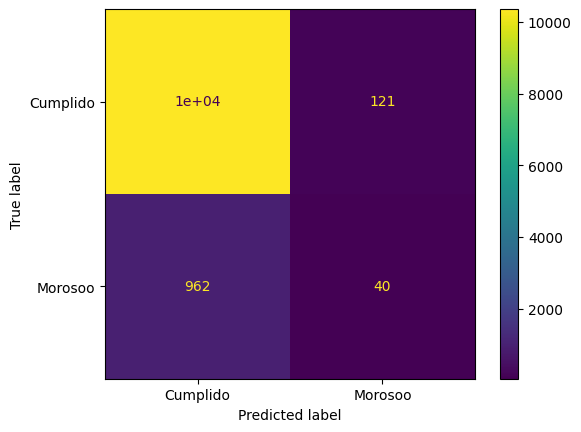

In [152]:
vis_confusion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusión,display_labels=['Cumplido','Morosoo'])
vis_confusion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [161]:
#Precisión del modelo (verdaderos positivos respecto a los positivos)
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
modelo_arbol.precision=precision_score(y_val,y_predicion)
print(f'La precisión del modelo es {round(modelo_arbol.precision,2)}')

La precisión del modelo es 0.25


In [157]:
#Sensibilidad del modelo
modelo_arbol.recall=recall_score(y_val,y_predicion)
print(f'La sensibilidad del modelo es {round(modelo_arbol.recall,2)}')

La sensibilidad del modelo es 0.04


In [159]:
#F1 del modelo
modelo_arbol.f1=f1_score(y_val,y_predicion)
print(f'El f1 del modelo es {round(modelo_arbol.f1,2)}')

El f1 del modelo es 0.07


In [162]:
#Exactitud del modelo
modelo_arbol.exactitud=accuracy_score(y_val,y_predicion)
print(f'La exactitud del modelo es {round(modelo_arbol.exactitud,2)}')

La exactitud del modelo es 0.91


### Curva ROC

In [163]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [166]:
#Funcion de curva roc
from sklearn.metrics import RocCurveDisplay

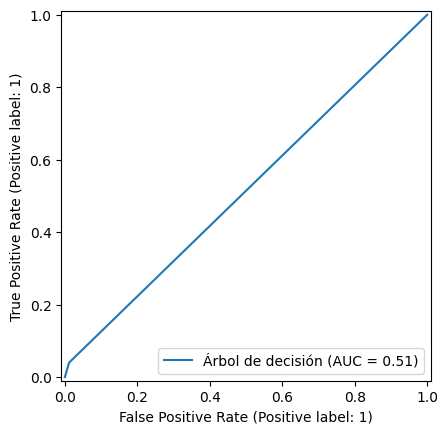

In [170]:
RocCurveDisplay.from_predictions(y_val,y_predicion,name='Árbol de decisión');

In [171]:
#Revisión de AUC
from sklearn.metrics import roc_auc_score

In [172]:
print(f'El área bajo la curva ROC es: {round(roc_auc_score(y_val,y_predicion),2)}')

El área bajo la curva ROC es: 0.51


### Curva de  precisión x sensibilidad

In [154]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [173]:
#Importación de funciones
from sklearn.metrics import PrecisionRecallDisplay

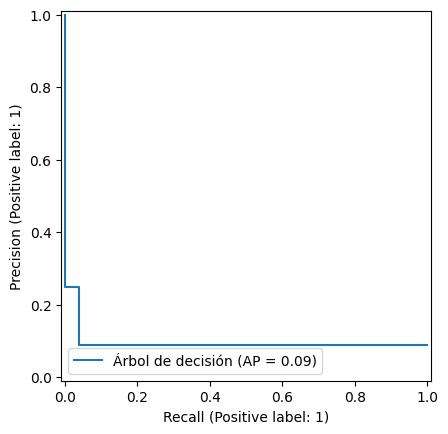

In [174]:
PrecisionRecallDisplay.from_predictions(y_val,y_predicion,name='Árbol de decisión');

In [175]:
#Revisiónd de AUC
from sklearn.metrics import average_precision_score

In [176]:
print(f'El área bajo la curva de precisión y sensibilidad es: {round(average_precision_score(y_val,y_predicion),2)}')

El área bajo la curva de precisión y sensibilidad es: 0.09


### Informe de métricas

In [178]:
#Reporte de clasificación
from sklearn.metrics import classification_report

In [179]:
print(classification_report(y_val,y_predicion))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [186]:
#Importando función de valiudación cruzadas
from sklearn.model_selection import KFold,cross_validate

In [183]:
#Creando modelo
modelo=DecisionTreeClassifier(max_depth=10)

In [187]:
#Preparando divisiones
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X,y,cv=kf,)

In [188]:
cv_resultado

{'fit_time': array([0.33921862, 0.24133682, 0.26658106, 0.23802304, 0.24283171]),
 'score_time': array([0.00375009, 0.00360036, 0.00379062, 0.00350499, 0.00361276]),
 'test_score': array([0.91311922, 0.90755662, 0.90744774, 0.91376307, 0.89960801])}

In [191]:
#Resultado de las iteraciones
cv_resultado['test_score']

array([0.91311922, 0.90755662, 0.90744774, 0.91376307, 0.89960801])

In [198]:
#Intervalo de confianza de exactitud
promedio=cv_resultado['test_score'].mean()
desvestd=cv_resultado['test_score'].std()
print(f'La exactitud del modelo es {round(promedio,3)} +- {round(desvestd*2,3)}')

La exactitud del modelo es 0.908 +- 0.01


### Validación cruzada con sensibilidad

In [203]:
#Función de presentación de sensibilidad
def intervalo_confianza(resultados):
  promedio=resultados['test_score'].mean()
  desvestd=resultados['test_score'].std()
  print(f'La sensibilidad del modelo es {round(promedio,3)} +- {round(desvestd*2,3)}')

In [204]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X,y,cv=kf,scoring='recall')
intervalo_confianza(cv_resultado)

La sensibilidad del modelo es 0.022 +- 0.008


### Estratificando los datos

In [206]:
#Proporción de resultados
df['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [207]:
#Función de estratificación
from sklearn.model_selection import StratifiedKFold,cross_validate

In [209]:
#Mantenter la proporción de datos
modelo=DecisionTreeClassifier(max_depth=10)
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X,y,cv=kf,scoring='recall')
intervalo_confianza(cv_resultado)

La sensibilidad del modelo es 0.029 +- 0.008


## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [211]:
#Funcio de oversampling, para balancear los datos
from imblearn.over_sampling import SMOTE

In [212]:
oversamplig=SMOTE()
X_res,y_res=oversamplig.fit_resample(X,y)

In [213]:
y_res.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [215]:
#Modelo con oversampling
modelo=DecisionTreeClassifier(max_depth=10)
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(modelo,X_res,y_res,cv=kf,scoring='recall')
intervalo_confianza(cv_resultado)


La sensibilidad del modelo es 0.743 +- 0.028


### Pipeline para validación

In [216]:
from imblearn.pipeline import Pipeline as imbpipeline

In [219]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [220]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(pipeline,X,y,cv=kf,scoring='recall')
intervalo_confianza(cv_resultado)

La sensibilidad del modelo es 0.247 +- 0.059


### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [221]:
#Funcion de undersampling
from imblearn.under_sampling import NearMiss

In [223]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])

In [224]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultado=cross_validate(pipeline,X,y,cv=kf,scoring='recall')
intervalo_confianza(cv_resultado)

La sensibilidad del modelo es 0.661 +- 0.035


### Probando el modelo

In [225]:
undersample=NearMiss(version=3)
X_res,y_res=undersample.fit_resample(X,y)

In [228]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(X_res,y_res)

DecisionTreeClassifier(max_depth=10)

In [230]:
y_previsto=modelo.predict(X_test)

In [231]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



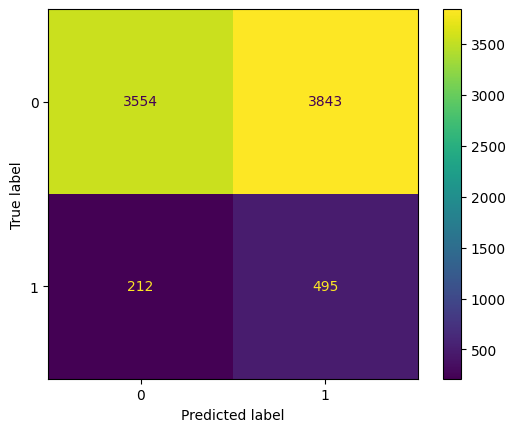

In [232]:
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);